In [4]:
import matplotlib.pyplot as plt 
from tqdm import tqdm 
from glob import glob 
import os 
import pandas as pd
import numpy as np
import cv2

In [44]:
filename = "pretrained2x_mae_Pflow_warping_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"


filepath = filename + "/" + sub + "/eval.csv"
df_warping = pd.read_csv(filepath)

df_warping.head

<bound method NDFrame.head of     Unnamed: 0  ssim_fake  cw-ssim_fake  ssim_baseframe  cw-ssim_baseframe  \
0            0   0.813035      0.926403        0.795589           0.922668   
1            1   0.925614      0.963618        0.913759           0.959531   
2            2   0.475023      0.742941        0.451181           0.737681   
3            3   0.271573      0.603535        0.254419           0.601876   
4            4   0.220685      0.510658        0.198453           0.509257   
5            5   0.566258      0.810793        0.524022           0.800386   
6            6   0.675859      0.868416        0.645806           0.862083   
7            7   0.780370      0.900288        0.755551           0.895168   
8            8   0.952083      0.985620        0.948681           0.984970   
9            9   0.884287      0.963002        0.873350           0.961237   
10          10   0.885754      0.947429        0.903582           0.958173   
11          11   0.964998      0.9

<AxesSubplot:>

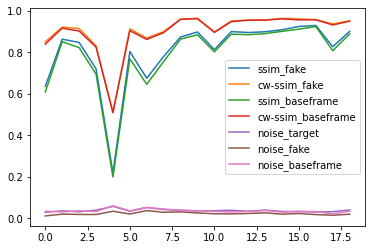

In [32]:
df.iloc[:,1:].plot()

<AxesSubplot:>

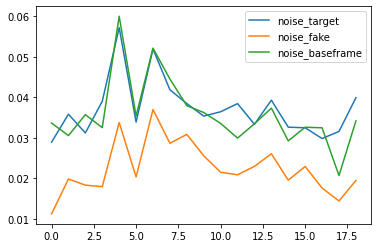

In [33]:
df[["noise_target", "noise_fake", "noise_baseframe"]].plot()

In [34]:
df[["noise_target", "noise_fake", "noise_baseframe"]].mean()

noise_target       0.037257
noise_fake         0.022595
noise_baseframe    0.035917
dtype: float64

<AxesSubplot:>

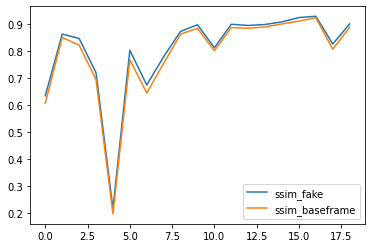

In [35]:
df[["ssim_fake", "ssim_baseframe"]].plot()

<AxesSubplot:>

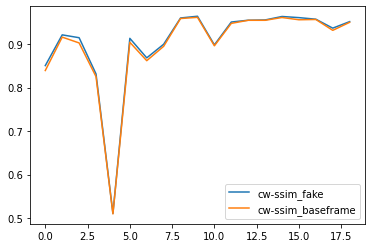

In [36]:
df[["cw-ssim_fake", "cw-ssim_baseframe"]].plot()

noise_target       0.037257
noise_fake         0.022595
noise_baseframe    0.035917
dtype: float64

In [52]:
filename = "pretrained2x_mae_Pflow_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"
filepath = filename + "/" + sub + "/eval.csv"
df = pd.read_csv(filepath)
df

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.520846,0.793857,0.795589,0.922668,0.024036,0.001967,0.024055,935.756635,317.194832,1150.298678
1,1,0.915791,0.954078,0.913759,0.959531,0.027813,0.012808,0.030157,2203.342900,1177.130027,2094.199361
2,2,0.443871,0.726595,0.451181,0.737681,0.026392,0.015240,0.027848,308.083312,111.547178,433.724787
3,3,0.382529,0.655431,0.254419,0.601876,0.032535,0.006576,0.032642,595.253537,85.911409,599.714113
4,4,0.248373,0.523144,0.198453,0.509257,0.057199,0.017676,0.060015,667.523784,55.965947,647.260969
5,5,0.664995,0.838913,0.524022,0.800386,0.033904,0.006769,0.035370,652.462021,72.379950,577.110683
6,6,0.736360,0.889987,0.645806,0.862083,0.051945,0.023468,0.052138,1058.966215,193.453713,889.827410
7,7,0.800223,0.900152,0.755551,0.895168,0.041874,0.016770,0.044525,522.241683,117.574541,655.378304
8,8,0.884650,0.958582,0.948681,0.984970,0.034475,0.019206,0.035029,2319.298329,1577.493511,2251.574578
9,9,0.941211,0.981099,0.873350,0.961237,0.031610,0.025625,0.032252,2728.577680,1706.702029,2240.661930


In [51]:
filename = "pretrained2x_mae_Pflow_blur3_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"
filepath = filename + "/" + sub + "/eval.csv"
df_blur3 = pd.read_csv(filepath)
df_blur3

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.668154,0.875581,0.795589,0.922668,0.024036,0.007659,0.024055,935.756635,337.383516,1150.298678
1,1,0.906774,0.958779,0.913759,0.959531,0.027813,0.015750,0.030157,2203.342900,882.483698,2094.199361
2,2,0.468956,0.740500,0.451181,0.737681,0.026392,0.016132,0.027848,308.083312,138.891328,433.724787
3,3,0.293468,0.617806,0.254419,0.601876,0.032535,0.011778,0.032642,595.253537,79.293563,599.714113
4,4,0.225331,0.514790,0.198453,0.509257,0.057199,0.026362,0.060015,667.523784,74.732730,647.260969
5,5,0.586503,0.815168,0.524022,0.800386,0.033904,0.013741,0.035370,652.462021,115.255780,577.110683
6,6,0.703756,0.871688,0.645806,0.862083,0.051945,0.025309,0.052138,1058.966215,172.381634,889.827410
7,7,0.785835,0.898644,0.755551,0.895168,0.041874,0.020364,0.044525,522.241683,125.797371,655.378304
8,8,0.727221,0.909360,0.948681,0.984970,0.034475,0.019135,0.035029,2319.298329,1289.748545,2251.574578
9,9,0.847422,0.951200,0.873350,0.961237,0.031610,0.023922,0.032252,2728.577680,1502.021199,2240.661930


In [50]:
filename = "pretrained2x_mae_Pflow_patch96_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"
filepath = filename + "/" + sub + "/eval.csv"
df_96 = pd.read_csv(filepath)
df_96

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.528089,0.809636,0.795589,0.922668,0.024036,0.008499,0.024055,935.756635,211.625932,1150.298678
1,1,0.918885,0.952308,0.913759,0.959531,0.027813,0.014729,0.030157,2203.342900,1666.244005,2094.199361
2,2,0.398793,0.709562,0.451181,0.737681,0.026392,0.015976,0.027848,308.083312,178.690091,433.724787
3,3,0.299766,0.618683,0.254419,0.601876,0.032535,0.014903,0.032642,595.253537,169.536162,599.714113
4,4,0.245869,0.525101,0.198453,0.509257,0.057199,0.018618,0.060015,667.523784,59.754326,647.260969
5,5,0.661765,0.838935,0.524022,0.800386,0.033904,0.004871,0.035370,652.462021,74.971663,577.110683
6,6,0.737833,0.878258,0.645806,0.862083,0.051945,0.027260,0.052138,1058.966215,148.352058,889.827410
7,7,0.823526,0.906919,0.755551,0.895168,0.041874,0.023596,0.044525,522.241683,126.394694,655.378304
8,8,0.830799,0.945646,0.948681,0.984970,0.034475,0.023850,0.035029,2319.298329,1247.818818,2251.574578
9,9,0.928010,0.975539,0.873350,0.961237,0.031610,0.027081,0.032252,2728.577680,2006.731658,2240.661930


In [49]:
filename = "pretrained2x_mae_Pflow_patch32_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"
filepath = filename + "/" + sub + "/eval.csv"
df_32 = pd.read_csv(filepath)
df_32

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.631517,0.849283,0.795589,0.922668,0.024036,0.005217,0.024055,935.756635,107.641528,1150.298678
1,1,0.924906,0.968250,0.913759,0.959531,0.027813,0.016610,0.030157,2203.342900,985.268039,2094.199361
2,2,0.443629,0.726693,0.451181,0.737681,0.026392,0.013543,0.027848,308.083312,164.530195,433.724787
3,3,0.406892,0.672840,0.254419,0.601876,0.032535,0.005449,0.032642,595.253537,80.477273,599.714113
4,4,0.263886,0.534166,0.198453,0.509257,0.057199,0.016979,0.060015,667.523784,42.918787,647.260969
5,5,0.696895,0.834634,0.524022,0.800386,0.033904,0.001428,0.035370,652.462021,234.781298,577.110683
6,6,0.707022,0.866983,0.645806,0.862083,0.051945,0.013272,0.052138,1058.966215,95.178227,889.827410
7,7,0.767174,0.882604,0.755551,0.895168,0.041874,0.011410,0.044525,522.241683,72.550046,655.378304
8,8,0.698278,0.901811,0.948681,0.984970,0.034475,0.016400,0.035029,2319.298329,894.609721,2251.574578
9,9,0.836544,0.948042,0.873350,0.961237,0.031610,0.025407,0.032252,2728.577680,1868.910019,2240.661930


In [53]:
df_warping

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.813035,0.926403,0.795589,0.922668,0.024036,0.006442,0.024055,935.756635,377.656284,1150.298678
1,1,0.925614,0.963618,0.913759,0.959531,0.027813,0.021169,0.030157,2203.342900,1124.028734,2094.199361
2,2,0.475023,0.742941,0.451181,0.737681,0.026392,0.018403,0.027848,308.083312,145.664537,433.724787
3,3,0.271573,0.603535,0.254419,0.601876,0.032535,0.020185,0.032642,595.253537,165.414980,599.714113
4,4,0.220685,0.510658,0.198453,0.509257,0.057199,0.031020,0.060015,667.523784,154.320927,647.260969
5,5,0.566258,0.810793,0.524022,0.800386,0.033904,0.018176,0.035370,652.462021,163.571154,577.110683
6,6,0.675859,0.868416,0.645806,0.862083,0.051945,0.035684,0.052138,1058.966215,352.722910,889.827410
7,7,0.780370,0.900288,0.755551,0.895168,0.041874,0.028482,0.044525,522.241683,234.556783,655.378304
8,8,0.952083,0.985620,0.948681,0.984970,0.034475,0.030880,0.035029,2319.298329,1984.936428,2251.574578
9,9,0.884287,0.963002,0.873350,0.961237,0.031610,0.026894,0.032252,2728.577680,1664.556530,2240.661930


In [59]:
df_f4.mean()

Unnamed: 0              9.000000
ssim_fake               0.707785
cw-ssim_fake            0.860757
ssim_baseframe          0.763689
cw-ssim_baseframe       0.888626
noise_target            0.032775
noise_fake              0.017523
noise_baseframe         0.034676
blur_target          1603.030196
blur_fake             575.318899
blur_baseframe       1613.509800
dtype: float64

In [58]:
filename = "pretrained2x_mse_Pflow_f4_256"
sub = "test_dataset_per_sequence/sep_trainlist_2x"
filepath = filename + "/" + sub + "/eval.csv"
df_f4 = pd.read_csv(filepath)
df_f4

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.398133,0.748478,0.795589,0.922668,0.024036,0.007948,0.024055,935.756635,161.894537,1150.298678
1,1,0.882431,0.941609,0.913759,0.959531,0.027813,0.018449,0.030157,2203.342900,819.258800,2094.199361
2,2,0.450827,0.719623,0.451181,0.737681,0.026392,0.011287,0.027848,308.083312,108.496926,433.724787
3,3,0.384358,0.672362,0.254419,0.601876,0.032535,0.010241,0.032642,595.253537,103.032013,599.714113
4,4,0.250793,0.529510,0.198453,0.509257,0.057199,0.019869,0.060015,667.523784,99.931269,647.260969
5,5,0.657074,0.806730,0.524022,0.800386,0.033904,0.008592,0.035370,652.462021,102.907017,577.110683
6,6,0.625407,0.847909,0.645806,0.862083,0.051945,0.032461,0.052138,1058.966215,174.268897,889.827410
7,7,0.673146,0.835056,0.755551,0.895168,0.041874,0.019706,0.044525,522.241683,109.234443,655.378304
8,8,0.674134,0.883198,0.948681,0.984970,0.034475,0.026768,0.035029,2319.298329,339.072375,2251.574578
9,9,0.790464,0.926612,0.873350,0.961237,0.031610,0.023817,0.032252,2728.577680,986.909218,2240.661930


In [62]:
filename = "pretrained2x_mse_Pflow_f1_256"
sub = "test_dataset_per_sequence/sep_trainlist_1x"
filepath = filename + "/" + sub + "/eval.csv"
df_f1 = pd.read_csv(filepath)
df_f1

,Unnamed: 0,ssim_fake,cw-ssim_fake,ssim_baseframe,cw-ssim_baseframe,noise_target,noise_fake,noise_baseframe,blur_target,blur_fake,blur_baseframe
0,0,0.791020,0.922805,0.795589,0.922668,0.024036,0.003877,0.024055,935.756635,153.464707,1150.298678
1,1,0.888718,0.952982,0.913759,0.959531,0.027813,0.014627,0.030157,2203.342900,281.278638,2094.199361
2,2,0.494333,0.744407,0.451181,0.737681,0.026392,0.015773,0.027848,308.083312,81.284484,433.724787
3,3,0.276159,0.606446,0.254419,0.601876,0.032535,0.019901,0.032642,595.253537,80.940986,599.714113
4,4,0.218420,0.511421,0.198453,0.509257,0.057199,0.036322,0.060015,667.523784,105.555566,647.260969
5,5,0.576285,0.814448,0.524022,0.800386,0.033904,0.016639,0.035370,652.462021,105.171345,577.110683
6,6,0.673781,0.870736,0.645806,0.862083,0.051945,0.029203,0.052138,1058.966215,168.001557,889.827410
7,7,0.757673,0.893853,0.755551,0.895168,0.041874,0.026325,0.044525,522.241683,110.087722,655.378304
8,8,0.927292,0.980467,0.948681,0.984970,0.034475,0.021209,0.035029,2319.298329,329.438325,2251.574578
9,9,0.849796,0.954593,0.873350,0.961237,0.031610,0.019064,0.032252,2728.577680,264.673640,2240.661930


In [63]:
df_f1.mean()

Unnamed: 0              9.000000
ssim_fake               0.768303
cw-ssim_fake            0.889575
ssim_baseframe          0.763689
cw-ssim_baseframe       0.888626
noise_target            0.032775
noise_fake              0.019223
noise_baseframe         0.034676
blur_target          1603.030196
blur_fake             225.618666
blur_baseframe       1613.509800
dtype: float64